In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [4]:
model_name = "STREAM"

In [5]:
gpa_analysis = pd.read_csv("analysis/{}_gpa_analysis.csv".format(model_name))
rip_analysis = pd.read_csv("analysis/{}_rip_analysis.csv".format(model_name))

In [6]:
gpa_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,674207,0,5.240880,5.240880,0.000000,0.000000
1,1,288283,385924,12.256838,7.015958,0.109221,0.109221
2,2,159264,129019,22.186043,9.929205,0.182248,0.073027
3,3,100473,58791,35.168035,12.981992,0.232164,0.049915
4,4,73429,27044,48.120470,12.952435,0.262779,0.030615
5,5,59735,13694,59.151888,11.031417,0.282156,0.019378
6,6,51757,7978,68.269761,9.117873,0.295704,0.013547
7,7,46554,5203,75.899772,7.630012,0.306011,0.010308
8,8,42579,3975,82.985462,7.085690,0.315011,0.009000
9,9,39380,3199,89.726714,6.741252,0.323159,0.008148


In [7]:
rip_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,49547,0,71.314873,71.314873,0.000000,0.000000
1,1,11850,37697,298.180422,226.865549,0.010669,0.010669
2,2,7240,4610,488.043923,189.863501,0.013278,0.002609
3,3,5350,1890,660.455701,172.411778,0.014883,0.001605
4,4,4230,1120,835.328132,174.872431,0.016151,0.001268
5,5,3527,703,1001.825347,166.497215,0.017146,0.000995
6,6,2977,550,1186.912328,185.086981,0.018080,0.000934
7,7,2538,439,1392.213554,205.301226,0.018949,0.000870
8,8,2215,323,1595.231603,203.018049,0.019681,0.000731
9,9,1959,256,1803.694742,208.463140,0.020333,0.000652


In [8]:
def analysis_visualize(df):
    fig, ax_1 = plt.subplots()

    ax_1.set_xlabel("threshold")
    ax_1.set_xticks(df["threshold"])

    # target_1 = "p"
    # target_1 = "p'"
    target_1 = "ratio'"
    target_2 = "upper limit for train/val accuracy"
    # target_2 = "accuracy'"
    
    color_1 = 'tab:red'
    ax_1.set_ylabel(target_1, color=color_1)
    ax_1.plot(df["threshold"], df[target_1], "o-", color=color_1)
    ax_1.tick_params(axis='y', labelcolor=color_1)
    #ax_1.vlines(df["threshold"], 0, df["p"], color=color_1, linestyles="dashed")

    ax_2 = ax_1.twinx()     # instantiate a second axes that shares the same x-axis

    color_2 = 'tab:blue'
    ax_2.set_ylabel(target_2, color=color_2)
    ax_2.plot(df["threshold"], df[target_2], "o-", color=color_2)
    ax_2.tick_params(axis='y', labelcolor=color_2)

    #ax_2.text(df["threshold"], str(df["upper limit for train/val accuracy"]), "b+")

    plt.show()

## ratio' and upper limit for train/val accuracy plot

As long as upper limit for train/val accuracy doesn't exceed 50%,  
find Threshold whose increase of ratio is the greatest.

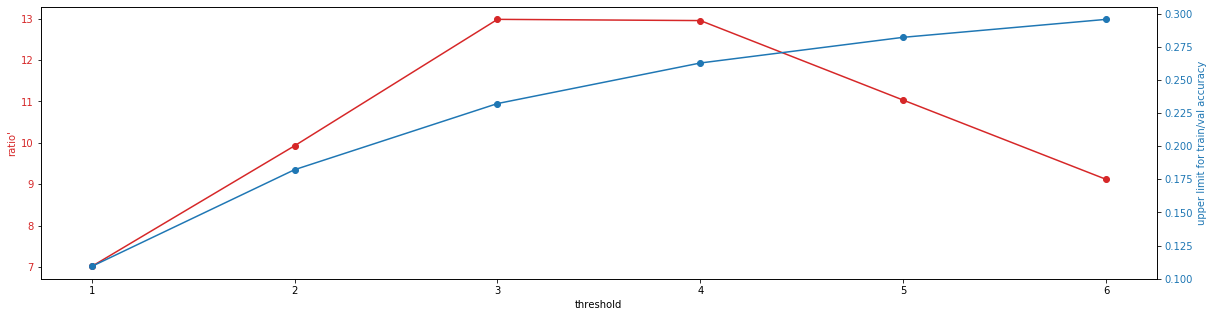

In [9]:
analysis_visualize(gpa_analysis[1:7])

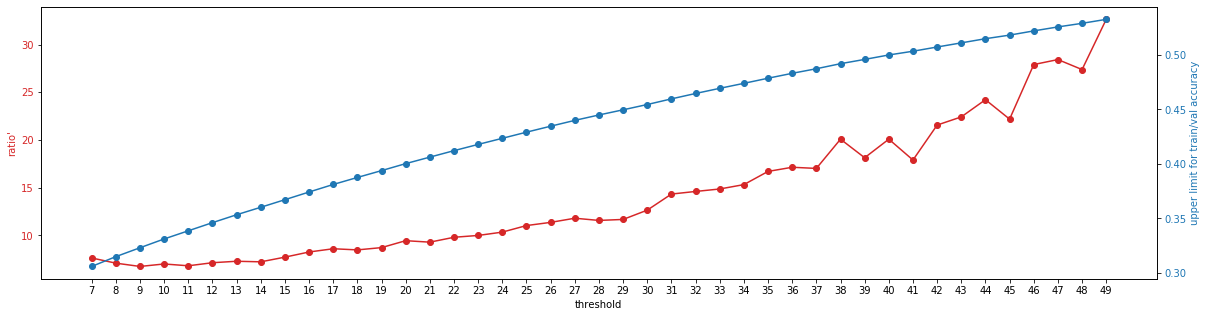

In [10]:
analysis_visualize(gpa_analysis[7:])

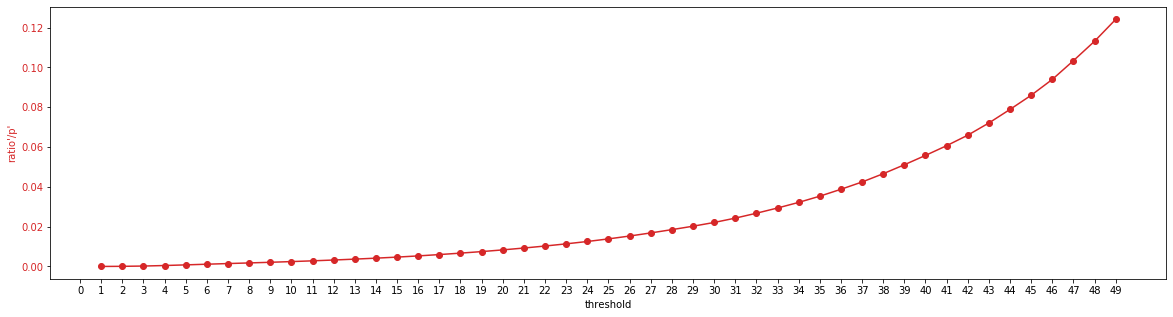

In [11]:
fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold")
ax_1.set_xticks(gpa_analysis["threshold"])

color_1 = 'tab:red'
ax_1.set_ylabel("ratio'/p'", color=color_1)
ax_1.plot(gpa_analysis["threshold"][1:], (gpa_analysis["ratio'"]/gpa_analysis["p'"])[1:], "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()